<a href="https://colab.research.google.com/github/AlphaVS-76/Crowd_Counting_with_Deep_Learning/blob/main/CCUDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mounting your Google Drive

Run this code and "mount" your google drive accoun to colab so that you can import and use the pretrained model according to your convenience.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Imports

Import the necessary libraries/frameworks and modules required for this project.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pretrainedmodel as cnn
import cv2
import torch

In [13]:
data = '/content/drive/MyDrive/lsc-cnn_weights/part_b_scale_4_epoch_24_weights.pth'

model = cnn.CNN(checkpoint_path = data)
model.cuda() #addition of GPU support on the tensors
# model.eval()
# model.train()


CNN(
  (relu): ReLU(inplace=True)
  (conv1_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3_1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4_1): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4_2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), p

In [19]:
image = cv2.imread('/content/crowd2.jpg')
# imread function = BGR
# human perception = RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

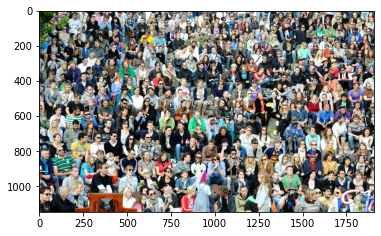

In [14]:
plt.imshow(image)

In [20]:
# take the heads and perceive them in a box && consider them as dots
dot_map, image_out = model.head_detection(image)

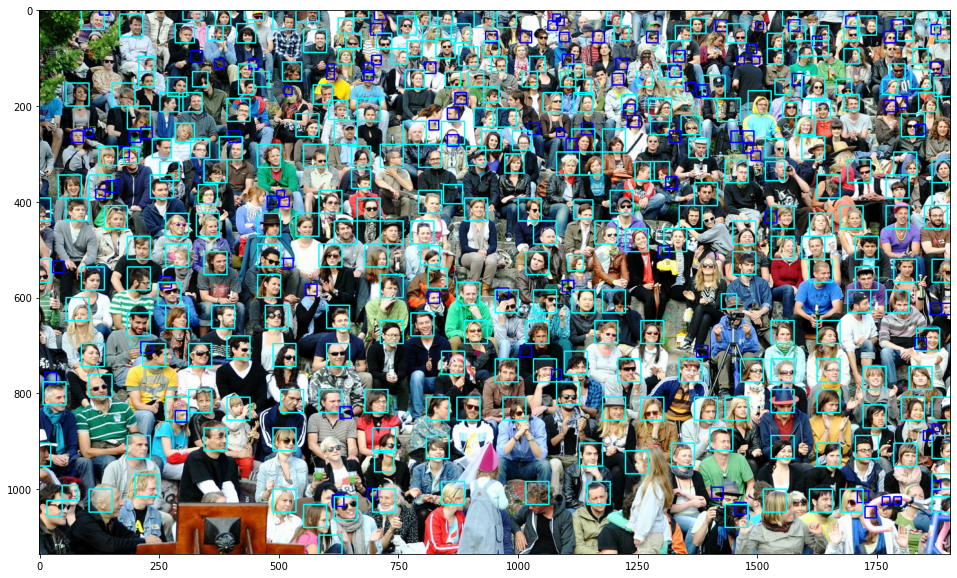

In [21]:
plt.figure(figsize=(18,10))
plt.imshow(image_out)
plt.show()

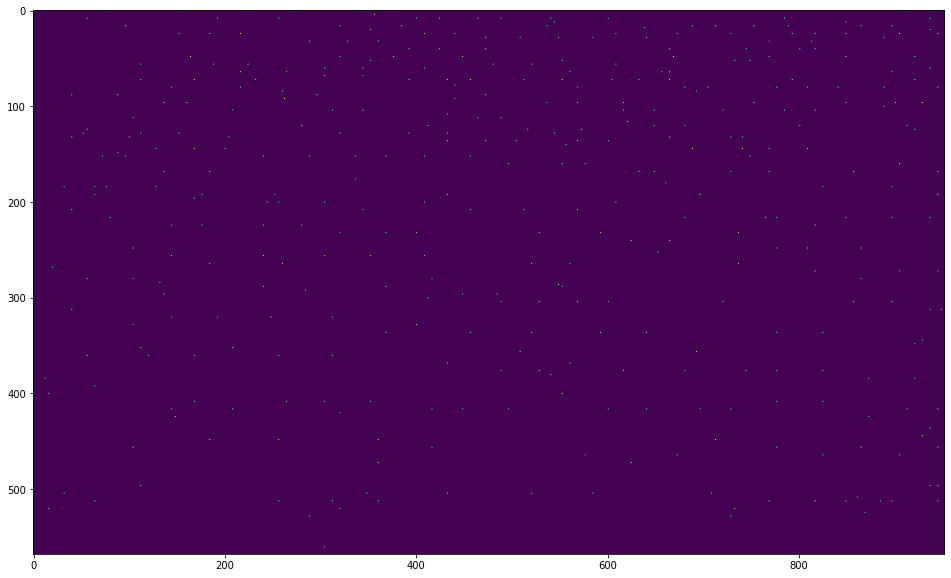

In [22]:
plt.figure(figsize=(18,10))
plt.imshow(dot_map)
plt.show()

In [24]:
# counting the dots == counting the number of people in the crowd
dot_map.sum()

403.0